In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('/Users/Lenovo/Desktop/EBAC')

In [7]:
data = pd.read_csv('recursos_humanos.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
data = pd.get_dummies(data, columns = ['sales'], prefix = 'Info_Sales', dtype=int)

In [11]:
data = pd.get_dummies(data, columns = ['salary'], prefix = 'Info_Salary', dtype = int)

In [13]:
y = data.left.values
x_data = data.drop(['left'], axis = 1)

In [15]:
#Normalizacion
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [17]:
# Bases de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [47]:
# Modelo KNN (K vecinos mas cercanos)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
#knn = KNeighborsClassifier(n_neighbors=3)

# Valor Optimo
k_range = range(1, 20)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())
    
# Crear tabla con los resultados
results_df = pd.DataFrame({
    'K': list(k_range),
    'CV_Accuracy': cv_scores
})

optimal_k = k_range[np.argmax(cv_scores)]
print(f"El valor óptimo de K es: {optimal_k}")

El valor óptimo de K es: 1


In [49]:
results_df

,K,CV_Accuracy
0,1,0.946376
1,2,0.943804
2,3,0.934756
3,4,0.942566
4,5,0.937232
5,6,0.942756
6,7,0.937041
7,8,0.941137
8,9,0.934565
9,10,0.938089


In [51]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('Score: ', knn.score(x_test, y_test))

Score:  0.9453333333333334


In [53]:
y_pred = prediction
y_true = y_test

In [55]:
# Creacion de la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[3233,  183],
       [  63, 1021]], dtype=int64)

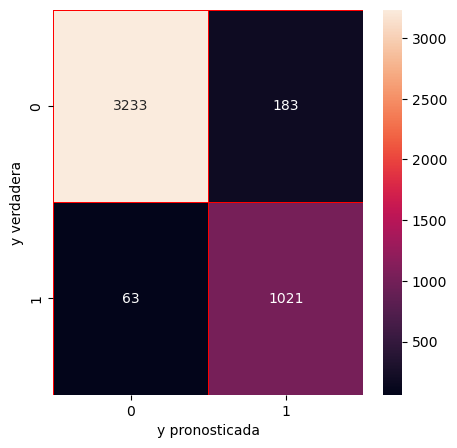

In [57]:
# Visualizacion de la matriz de confusion
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt = '.0f', ax = ax)
plt.xlabel('y pronosticada')
plt.ylabel('y verdadera')
plt.show()

Para el primer caso podemos concluir que cuando predecimos que un empleado no dejara la compañia, tenemos un 98% de acertividad.
Para el segundo caso podemos concluir que cuando predecimos que un empleado dejara la compañia, tenemos un 84% de acertividad.

In [59]:
# Calculo de la precision global
Correctos = cm[0,0] + cm[1,1]
Incorrectos = cm[0,1] + cm[1,0]
PrecisionGlobal = Correctos / (Correctos + Incorrectos)
PrecisionGlobal

0.9453333333333334

In [61]:
PrecisionNoLeft = cm[0,0] / (cm[0,0] + cm[1,0])
PrecisionNoLeft

0.9808859223300971

In [63]:
PrecisionLeft = cm[1,1] / (cm[1,1] + cm[0,1])
PrecisionLeft

0.8480066445182725

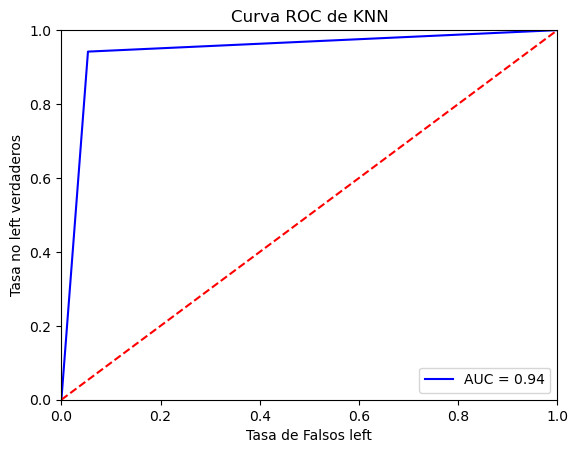

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = knn.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operation Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Tasa no left verdaderos')
plt.xlabel('Tasa de Falsos left')
plt.title('Curva ROC de KNN')
plt.show()

Tenemos una tasa baja de personal que se pronostico que dejara la compañia y si la dejara. Y al tener la grafica AUC muy cerca del cero en el eje X, podemos determinar que la tasa de empleados predecidos que no dejaran la compañia, efectivamente no lo dejara.